# Tutorial MongoDB y scikit-learn

## Instalación de bibliotecas pymongo

In [1]:
!pip install pymongo
import pymongo

## Conexión, visualización, selección o creación de base de datos

In [2]:
"""
!pip install mysql
!pip install mysql-connector-python
import mysql.connector as sql
import pandas as pd

db_connect = sql.connect(host='127.0.0.1', database='datasets_ml', user = 'root', password = 'Mang2guo3')
#print(db_connect)

# Query data
query = "SELECT * FROM winequality_red"
df = pd.read_sql(query, db_connect)

# Print the first few rows of the dataframe
print(df.head())

# Close the connection
#db_connect.close()
"""


'\n!pip install mysql\n!pip install mysql-connector-python\nimport mysql.connector as sql\nimport pandas as pd\n\ndb_connect = sql.connect(host=\'127.0.0.1\', database=\'datasets_ml\', user = \'root\', password = \'Mang2guo3\')\n#print(db_connect)\n\n# Query data\nquery = "SELECT * FROM winequality_red"\ndf = pd.read_sql(query, db_connect)\n\n# Print the first few rows of the dataframe\nprint(df.head())\n\n# Close the connection\n#db_connect.close()\n'

In [3]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
dblist = myclient.list_database_names()
print(dblist)

['admin', 'config', 'datasets_ml', 'local']


## Visualización, selección o creación de la colección

In [4]:
mydb = myclient["datasets_ml"]
print(mydb.list_collection_names())

['iris', 'wine']


In [5]:
mycol = mydb["iris"]

## Comandos MongoDB

### Buscar un solo documento (Find One)

In [6]:
x = mycol.find_one()

print(x)


None


### Buscar varios documentos (Find) y condicionales

In [7]:
for x in mycol.find().limit(5):
  print(x)

In [8]:
myquery = { "Species": "Iris-versicolor"}
mydoc = mycol.find(myquery).limit(10)

for x in mydoc:
  print(x)

In [9]:
myquery = { "SepalLengthCm": { "$lt": 6.0 } }
mydoc = mycol.find(myquery).limit(10)

for x in mydoc:
  print(x)

### Insert One

In [10]:
mydict = { 'Id': 151, 'SepalLengthCm': 5.0, 'SepalWidthCm': 3.2, 'PetalLengthCm': 1.6, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa' }
x = mycol.insert_one(mydict)
print(x)

InsertOneResult(ObjectId('66da5ae664538d5b11862846'), acknowledged=True)


In [11]:
myquery = { "Id": 151}
mydoc = mycol.find(myquery)

for x in mydoc:
  print(x)

{'_id': ObjectId('66da5ae664538d5b11862846'), 'Id': 151, 'SepalLengthCm': 5.0, 'SepalWidthCm': 3.2, 'PetalLengthCm': 1.6, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}


### Update One

In [12]:
myquery = { "Id": 151}
newvalues = { "$set": { "SepalLengthCm": 5.1 } }
mycol.update_one(myquery, newvalues)
#Imprimir despues de la actualización
myquery = { "Id": 151}
mydoc = mycol.find(myquery)
for x in mydoc:
  print(x)

{'_id': ObjectId('66da5ae664538d5b11862846'), 'Id': 151, 'SepalLengthCm': 5.1, 'SepalWidthCm': 3.2, 'PetalLengthCm': 1.6, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}


### Delete One

In [13]:
myquery = { "Id": 151}
x = mycol.delete_many(myquery)

print(x.deleted_count, " Documento eliminado.")

1  Documento eliminado.


In [14]:
myquery = { "Id": 151}
mydoc = mycol.find(myquery)
for x in mydoc:
  print(x)

## MongoDB a DataFrame

In [15]:
import pandas as pd
cursor = mycol.find()
print(cursor)
print('Type of cursor:',type(cursor))

Type of cursor: <class 'pymongo.cursor.Cursor'>


In [16]:
"""list_cur = list(cursor)
print(list_cur[1:5])
df = pd.DataFrame(list_cur)
print('Type of df:', type(df))"""

# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["datasets_ml"]  # Your database
collection = db["wine"]  # Your collection

# Fetch the data from the wine collection
cursor = collection.find()  # Fetch all records

# Convert the cursor to a list
list_cur = list(cursor)

# Convert the list of documents into a DataFrame
df = pd.DataFrame(list_cur)

# Optionally, drop the '_id' column (which is MongoDB-specific)
if '_id' in df.columns:
    df = df.drop('_id', axis=1)

# Check the DataFrame
print(df.head())
print('Type of df:', type(df))



   id  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0   1            7.4              0.70         0.00             1.9   
1   2            7.8              0.88         0.00             2.6   
2   3            7.8              0.76         0.04             2.3   
3   4           11.2              0.28         0.56             1.9   
4   5            7.4              0.70         0.00             1.9   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  class  
0       0.56      9.4      0  
1       0.68      9.8      0  
2       0.65      9.8      0  
3   

In [17]:
df.head(5)

,id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [18]:
print(df.columns)

Index(['id', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'class'],
      dtype='object')


In [19]:
df = df.drop(['id'], axis=1)

In [20]:
df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


## Construcción del conjunto de datos separando variables independientes y la variable dependiente

In [21]:
# Drop the 'class' column (which is the dependent variable)
X = df.drop(['class'], axis=1)

# Set 'class' as the dependent variable (target)
y = df['class']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Check the shape of the training and testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1119, 11) (480, 11) (1119,) (480,)


## Creación de un modelo de clasificación utilizando un árbol de decisión

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## Visualización del árbol de decisión

In [23]:
from sklearn import tree
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


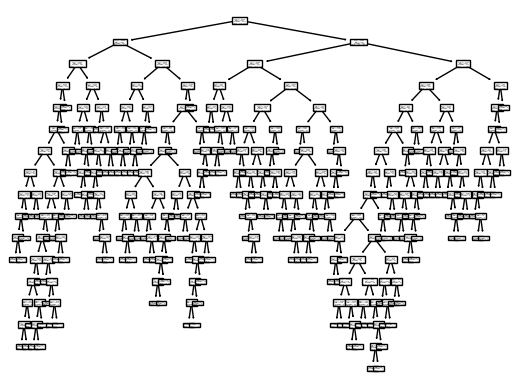

In [24]:
tree.plot_tree(clf)
plt.show()

## Evaluación del modelo

In [25]:
predicciones_modelo = clf.predict(X_test) # con esto aplicamos el modelo a los datos de prueba

In [26]:
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)
from sklearn.metrics import ConfusionMatrixDisplay

# confusion matrix
cm = confusion_matrix(y_test, predicciones_modelo)
print ("Confusion Matrix : \n", cm)


# Exactitud de modelo
print('Test accuracy = ', accuracy_score(y_test,predicciones_modelo))

Confusion Matrix : 
 [[181  69]
 [ 61 169]]
Test accuracy =  0.7291666666666666
